In [17]:
import re
import requests
from bs4 import BeautifulSoup
import pandas as pd

base_url = "https://oneamz.com/kullanici-yorumlari/"

def scrape_reviews(base_url):
    title = []
    rating = []
    date = []
    name = []
    desc = []

    review_pages = [f"{base_url}?reviews-page={page_num}" for page_num in range(1, 14)]

    for page_link in review_pages:
        response = requests.get(page_link)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            for review in soup.find_all("div", class_=["glsr-review"]):
                title.append(review.h3.text)
                rating.append(re.search(r'\d+', review.find("span", class_=["screen-reader-text"]).text).group())
                date.append(review.find("div", class_=["glsr-review-date"]).span.text)
                desc.append(review.find("div", class_=["glsr-review-content"]).p.text)
                name.append(review.find("div", class_=["glsr-review-author"]).span.text)
        else:
            print(f"Error: Page could not be fetched - {page_link}")

    return pd.DataFrame({"title": title, "rating": rating, "date": date, "desc": desc, "name": name})

# Run the function to scrape the reviews
df = scrape_reviews(base_url)
print(df)

                                                 title rating  \
0           Öncelikle oneamz ailesine teşekkür ederim!      5   
1                NAZMİ BEYE teşekkürlerimi iletiyorum!      5   
2    Oneamz ekibine ve özellikle Nazmi Çalışkan bey...      5   
3    Her zamanki gibi aynı şevkle işini yapıyor. Ço...      5   
4               Simge hanıma teşekkürlerimi iletiyorum      5   
..                                                 ...    ...   
121                      Sorunsuz İşlemler ve Satışlar      5   
122                               Çok iyi ve Kaliteli!      5   
123            Hem Yazılım Hem Hizmet Olarak 1 Numara!      5   
124                     7/24 Desteği ile Piyasada TEK!      5   
125                         Kesinlikle Tavsiye Ederim!      5   

                 date                                               desc  \
0    Ağustos 28, 2023  Öncelikle oneamz ailesine teşekkür ederim çok ...   
1    Ağustos 28, 2023  NAZMİ BEYE teşekkürlerimi iletiyorum soruma 

In [ ]:
# pip install googletrans==4.0.0-rc1


In [18]:
import pandas as pd
from googletrans import Translator


# Initialize the translator
translator = Translator()

# Function to translate text
def translate_to_english(text):
    try:
        return translator.translate(text, src='tr', dest='en').text
    except Exception as e:
        print(f"Error: {e}")
        return text

# Translate the Turkish column to English
df['english_texts'] = df['desc'].apply(translate_to_english)

print(df)


                                                 title rating  \
0           Öncelikle oneamz ailesine teşekkür ederim!      5   
1                NAZMİ BEYE teşekkürlerimi iletiyorum!      5   
2    Oneamz ekibine ve özellikle Nazmi Çalışkan bey...      5   
3    Her zamanki gibi aynı şevkle işini yapıyor. Ço...      5   
4               Simge hanıma teşekkürlerimi iletiyorum      5   
..                                                 ...    ...   
121                      Sorunsuz İşlemler ve Satışlar      5   
122                               Çok iyi ve Kaliteli!      5   
123            Hem Yazılım Hem Hizmet Olarak 1 Numara!      5   
124                     7/24 Desteği ile Piyasada TEK!      5   
125                         Kesinlikle Tavsiye Ederim!      5   

                 date                                               desc  \
0    Ağustos 28, 2023  Öncelikle oneamz ailesine teşekkür ederim çok ...   
1    Ağustos 28, 2023  NAZMİ BEYE teşekkürlerimi iletiyorum soruma 

In [20]:
from textblob import TextBlob
# TextBlob is a Python library for textual data processing, offering a simple API for various natural language processing (NLP) 
# tasks like sentiment analysis, part-of-speech tagging, and more.

# Function to get sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if -0.05 < analysis.sentiment.polarity < 0.05:  # Adjust these values as needed
        return 'Neutral'
    elif analysis.sentiment.polarity > 0:
        return 'Positive'
    else:
        return 'Negative'

# Apply the sentiment analysis function to the 'texts' column
df['sentiment'] = df['english_texts'].apply(get_sentiment)

print(df)


                                                 title rating  \
0           Öncelikle oneamz ailesine teşekkür ederim!      5   
1                NAZMİ BEYE teşekkürlerimi iletiyorum!      5   
2    Oneamz ekibine ve özellikle Nazmi Çalışkan bey...      5   
3    Her zamanki gibi aynı şevkle işini yapıyor. Ço...      5   
4               Simge hanıma teşekkürlerimi iletiyorum      5   
..                                                 ...    ...   
121                      Sorunsuz İşlemler ve Satışlar      5   
122                               Çok iyi ve Kaliteli!      5   
123            Hem Yazılım Hem Hizmet Olarak 1 Numara!      5   
124                     7/24 Desteği ile Piyasada TEK!      5   
125                         Kesinlikle Tavsiye Ederim!      5   

                 date                                               desc  \
0    Ağustos 28, 2023  Öncelikle oneamz ailesine teşekkür ederim çok ...   
1    Ağustos 28, 2023  NAZMİ BEYE teşekkürlerimi iletiyorum soruma 

In [21]:
# Select desired columns
selected_columns = ['english_texts', 'sentiment']
df2 = df[selected_columns]

print(df2)

                                         english_texts sentiment
0    First of all, thank you to the Oneamz family, ...  Positive
1    I thank Nazmi Bey, I am very pleased to approa...  Positive
2    Hello to me, I would like to thank the Oneamz ...  Positive
3    Hello, Zoom Meeting is finished with our Accou...  Negative
4    I thank you to the Simge lady.At the opening o...  Positive
..                                                 ...       ...
121  Since I started to use it, I would like to tha...  Positive
122  Whether it is a program or employees, very goo...  Positive
123  Oneamz number one in every aspect as a softwar...   Neutral
124  You can make 12 magza emergency with Oneamz Un...   Neutral
125  As a software that offers the best service com...  Positive

[126 rows x 2 columns]


In [22]:
# Assuming you've already applied the sentiment analysis to your DataFrame
sentiment_counts = df2['sentiment'].value_counts()

# Ensure all sentiments are in the index
for sentiment in ['Positive', 'Neutral', 'Negative']:
    if sentiment not in sentiment_counts.index:
        sentiment_counts[sentiment] = 0

print(sentiment_counts)

Positive    112
Neutral      12
Negative      2
Name: sentiment, dtype: int64


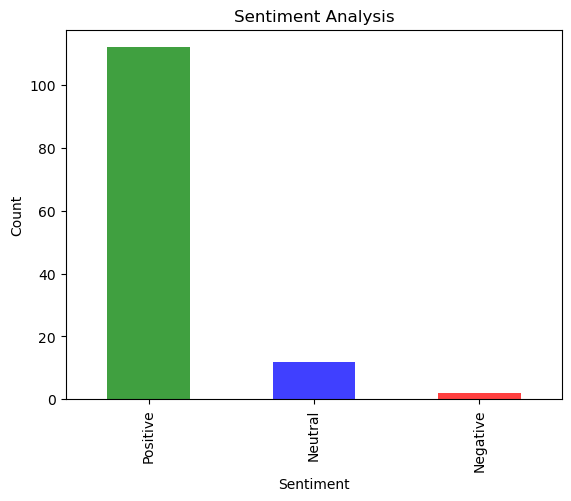

In [23]:
import matplotlib.pyplot as plt
# Apply the sentiment analysis function to the 'texts' column
df['sentiment'] = df2['english_texts'].apply(get_sentiment)

# Count occurrences of each sentiment
sentiment_counts = df2['sentiment'].value_counts()

# Plot the results
sentiment_counts.plot(kind='bar', color=['green', 'blue','red'], title='Sentiment Analysis', alpha=0.75)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [24]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


# Convert texts into TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust the max_features as needed
X = vectorizer.fit_transform(df2['english_texts'])

# Encode the sentiment labels
label_map = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
y = df2['sentiment'].map(label_map)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression classifier
clf = LogisticRegression(solver='liblinear')
clf.fit(X_train, y_train)

# Predict sentiments for test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))


unique_labels = y_test.unique()
unique_labels_names = [k for k, v in label_map.items() if v in unique_labels]
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=unique_labels_names, zero_division=1))


# Make predictions for new data (if needed)
# new_texts = ["Your new texts here"]
# new_features = vectorizer.transform(new_texts)
# predictions = clf.predict(new_features)
# print(predictions)


Accuracy: 0.8846153846153846
Classification Report:
               precision    recall  f1-score   support

    Positive       1.00      0.00      0.00         3
     Neutral       0.88      1.00      0.94        23

    accuracy                           0.88        26
   macro avg       0.94      0.50      0.47        26
weighted avg       0.90      0.88      0.83        26



In [25]:
# Convert texts to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df2['english_texts'])

# Map sentiment labels to integer values
label_map = {'Positive': 2, 'Neutral': 1, 'Negative': 0}
y = df2['sentiment'].map(label_map)

# Split into training and test sets using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Train the multi-class logistic regression classifier
multi_clf = LogisticRegression(solver='lbfgs', multi_class='multinomial')
multi_clf.fit(X_train, y_train)

# Predict sentiments for the test set
multi_y_pred = multi_clf.predict(X_test)
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

unique_labels = y_test.unique()
label_names = ['Negative', 'Neutral', 'Positive']

# Filter target names based on the unique labels in y_test
selected_names = [label_names[i] for i in sorted(unique_labels)]

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=unique_labels_names, zero_division=1))

Accuracy: 0.11538461538461539
Classification Report:
               precision    recall  f1-score   support

    Positive       0.12      1.00      0.21         3
     Neutral       1.00      0.00      0.00        23

    accuracy                           0.12        26
   macro avg       0.56      0.50      0.10        26
weighted avg       0.90      0.12      0.02        26



In [72]:
df2.to_excel("english_texts.xlsx",index=False)

In [ ]:
#Recommendation:

#If you're just starting out or have a small dataset, start with linear models or Naive Bayes. 
#They're simple, fast, and can serve as a good baseline.

#If you have more data and computational resources, consider Random Forests or deep learning models.

#If you want state-of-the-art performance and have the resources, consider using Transformer-based models like BERT. 
#Fine-tuning a pre-trained BERT model on your sentiment analysis task might give excellent results.

In [ ]:
%%writefile sentiment.py
import streamlit as st
from textblob import TextBlob
import pandas as pd

# Load the data from the Excel file
english_texts_df = pd.read_excel('english_texts.xlsx')

st.markdown(
    """
    <style>
        .title {
            font-size: 72px;
            font-weight: bold;
            color: yellow;
        }
        .subtitle {
            font-size: 72px;
            font-weight: bold;
            color: black;
        }
        .stButton>button {
            color: black;
            border: 3px yellow;
        }
        .big-title {
            font-size: 28px;  # Adjust size as needed
        }
    </style>
    """, unsafe_allow_html=True
)

st.markdown(
    """
    <span class="title">One</span><span class="subtitle">AMZ</span>
    """, unsafe_allow_html=True
)

st.markdown('<p class="big-title">Sentiment Analysis</p>', unsafe_allow_html=True)

# Dropdown to choose text
selected_text = st.selectbox("Choose a text", english_texts_df['english_texts'].tolist())
user_input = st.text_area("Enter text for sentiment analysis", selected_text)

if st.button('Analyze'):
    blob = TextBlob(user_input)
    sentiment_polarity = blob.sentiment.polarity
    if -0.05 < sentiment_polarity < 0.05:
        result = 'Neutral'
    elif sentiment_polarity > 0:
        result = 'Positive'
    else:
        result = 'Negative'
    st.write(f"The sentiment is: **{result}**")


Overwriting sentiment.py


In [27]:
!streamlit run sentiment.py

^C
